In [1]:
%reset -f
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets as dt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


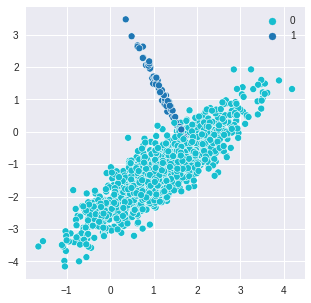

(1500, 2)
(1500,)


In [2]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')

fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(5,5))
plt_ind_list = np.arange(3)+131

for class_sep,plt_ind in zip([1],plt_ind_list):
    X,y = dt.make_classification(
    n_samples=1500, 
    n_features=2, 
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.95],
    flip_y=0.01, #add noise
    class_sep =1.2,
    random_state=42
)
    palette = {0:"tab:cyan",
               1:"tab:blue", 
               }
    sns.scatterplot(X[:,0],X[:,1], hue = y, palette=palette )

plt.show()

print(X.shape)
print(y.shape)

In [3]:
input_size = 2 
hidden_size = 2
output_size = 1

In [14]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        # weights
        self.W1 = torch.randn(input_size, hidden_size, requires_grad=True)
        self.W2 = torch.randn(hidden_size, hidden_size, requires_grad=True)
        self.W3 = torch.randn(hidden_size, output_size, requires_grad=True)
#         self.W4 = torch.randn(hidden_size, output_size, requires_grad=True)
        
        # Add bias
        self.b1 = torch.randn(hidden_size, requires_grad=True)
        self.b2 = torch.randn(hidden_size, requires_grad=True)
        self.b3 = torch.randn(hidden_size, requires_grad=True)
#         self.b4 = torch.randn(output_size, requires_grad=True)
        self.relu = nn.ReLU()
        
    def forward(self, inputs):
        z1 = inputs.mm(self.W1).add(self.b1)
        a1 = self.relu(z1)
        z2 = a1.mm(self.W2).add(self.b2)
        a2 = self.relu(z2)
        z3 = a2.mm(self.W3).add(self.b3)
        output = 1 / (1 + torch.exp(-z3))
        return output

In [23]:
W1 = torch.randn(2, 2, requires_grad=True)
W2 = torch.randn(2, 2, requires_grad=True)
W3 = torch.randn(2, 1, requires_grad=True)
print(W1)
print(W2)
print(W3)

tensor([[ 0.4254,  0.0785],
        [-0.1812, -0.7807]], requires_grad=True)
tensor([[-0.5802, -0.2918],
        [ 0.7640, -0.0522]], requires_grad=True)
tensor([[-0.2591],
        [ 0.8751]], requires_grad=True)


In [24]:
b1 = torch.randn(2, requires_grad=True)
b2 = torch.randn(2, requires_grad=True)
b3 = torch.randn(1, requires_grad=True)
print(b1)
print(b2)
print(b3)

tensor([-0.7768, -1.0597], requires_grad=True)
tensor([0.9749, 0.0499], requires_grad=True)
tensor([-0.0046], requires_grad=True)


In [25]:
torch.randn(1,2).mm(W1).add(b1)

tensor([[-0.6161, -1.5503]], grad_fn=<AddBackward0>)

In [26]:
z1 = torch.randn(1,2).mm(W1).add(b1)
a1 = 1 / (1 + torch.exp(-z1))
z2 = a1.mm(W2).add(b2)
a2 = 1 / (1 + torch.exp(-z2))
z3 = a2.mm(W3).add(b3)
output = 1 / (1 + torch.exp(-z3))
print(z1)
print(a1)
print(output)

tensor([[-1.3330, -1.7113]], grad_fn=<AddBackward0>)
tensor([[0.2087, 0.1530]], grad_fn=<MulBackward0>)
tensor([[0.5599]], grad_fn=<MulBackward0>)


In [27]:
epochs = 10000
learning_rate = 0.005

In [28]:
model = NeuralNetwork(input_size, hidden_size, output_size)

In [29]:
inputs = torch.tensor(X, dtype=torch.float)
labels = torch.tensor(y, dtype=torch.float)

print(labels.shape)

torch.Size([1500])


In [32]:
def maximum(a, b):
      
    if a >= b:
        return a
    else:
        return b

In [55]:
losses = []
for epoch in range(epochs):

    # forward function
    output = model.forward(inputs)
    for i in range(len(output)):
        out_1 = output[:][i][0]
        out_2 = output[:][i][1]
        output[i] = maximum(out_1,out_2)
    print(output)
    #BinaryCrossEntropy formula
    # loss = -((labels * torch.log(output)) + (1 - labels) * torch.log(1 - output)).sum()
    
    #MSE Loss Function
    loss = ((labels - output) ** 2).sum() / 500
    
    #Log the log so we can plot it later
    losses.append(loss.item())
    if not epoch%500: print(epoch, loss.item())

    #calculate the gradients of the weights wrt to loss
    loss.backward()

    #adjust the weights based on the previous calculated gradients
    model.W1.data -= learning_rate * model.W1.grad
    model.W2.data -= learning_rate * model.W2.grad
    model.W3.data -= learning_rate * model.W3.grad
    model.b1.data -= learning_rate * model.b1.grad
    model.b2.data -= learning_rate * model.b2.grad
    model.b3.data -= learning_rate * model.b3.grad

    #clear the gradients so they wont accumulate
    model.W1.grad.zero_()
    model.W2.grad.zero_()
    model.W3.grad.zero_()
    model.b1.grad.zero_()
    model.b2.grad.zero_()
    model.b3.grad.zero_()

tensor([[0.5846, 0.5846],
        [0.3672, 0.3672],
        [0.9379, 0.9379],
        ...,
        [0.9962, 0.9962],
        [0.7949, 0.7949],
        [0.8804, 0.8804]], grad_fn=<CopySlices>)


RuntimeError: The size of tensor a (1500) must match the size of tensor b (2) at non-singleton dimension 1

In [39]:
x = [[1,2,3]
      ,[4,5,6],
       [7,8,9]]

print(x[:][0][1])

2


In [ ]:
print("Final loss: ", losses[-1])
plt.plot(losses)

In [ ]:
print(model.W1)
print(model.W2)
print(model.W3)

In [ ]:
print(model.b1)
print(model.b2)
print(model.b3)

In [ ]:
from manim import *


class CreateCircle(Scene):
    def construct(self):
        circle = Circle()  # create a circle
        circle.set_fill(PINK, opacity=0.5)  # set the color and transparency
        self.play(Create(circle))  # show the circle on screen